# Installing requirements

`pip install -r requirements.txt`

# Import and connections

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from sklearn.model_selection import train_test_split

tf.keras.config.disable_traceback_filtering()   # полные логи ошибок
# import seaborn as sns

# Data generation

In [15]:
X, y = make_classification(
    n_samples=490, 
    n_features=3,
    n_repeated=0, 
    n_redundant=0, 
    n_informative=3, 
    n_classes=4,                            # количество классов
    n_clusters_per_class=2,                 # по 2 кластера на каждый класс
    random_state=312,
    scale=25,
    hypercube=True,                        # классы не будут располагаться внутри гиперкуба
    weights=[0.11, 0.29, 0.17, 0.43])  # задаем имбаланс классов

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    train_size=0.8,
    random_state=312,
    shuffle=True)

In [16]:
print(f"Sample: {X[0]}, tag: {y[0]}")

Sample: [ 6.47119868 38.19116261  0.90577576], tag: 3


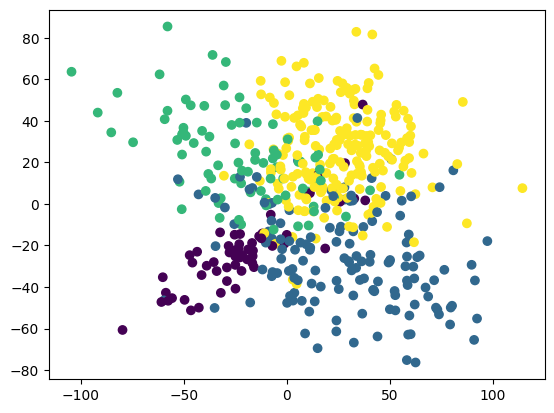

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y)

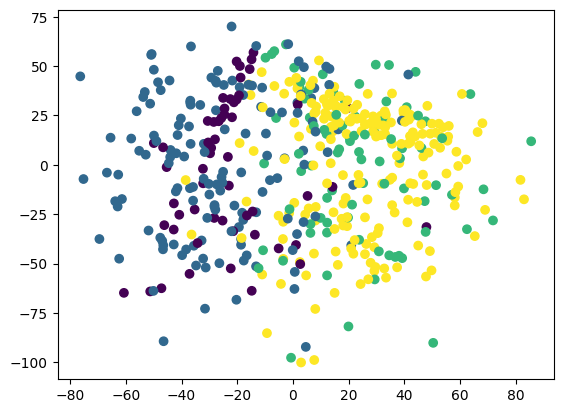

In [18]:
plt.scatter(X[:, 1], X[:, 2], c=y)

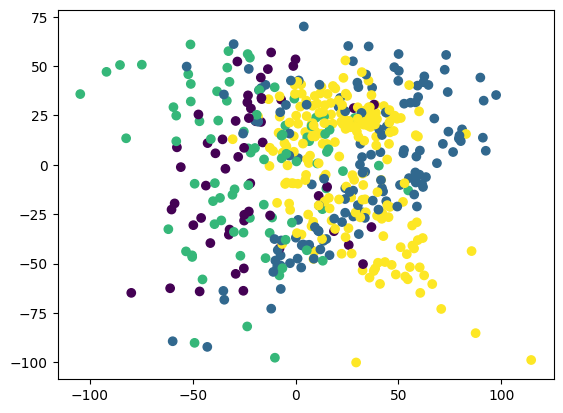

In [19]:
plt.scatter(X[:, 0], X[:, 2], c=y)

Text(0.5, 0, 'X3')

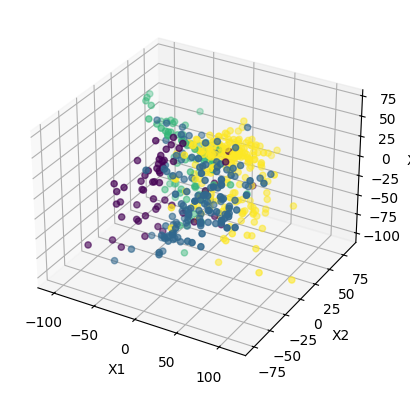

In [20]:
ax = plt.axes(projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, )
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Creating model

Без регуляризации:

In [21]:
def create_model(): 
    return Sequential([
        Input(shape=(3,)),
        Dense(10, activation='relu'),
        Dense(10, activation='relu'),
        Dense(5, activation='softmax')  # для многоклассовой классификации
    ])


С регуляризацией (dropout):

In [22]:
def create_model_dropout():
    return Sequential([
        Input(shape=(3,)),
        Dense(10, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='relu'),
        Dense(5, activation='softmax')
    ])

# Train models

Код, обучающий модели с разными оптимизаторами:

In [23]:
print("Eager execution:", tf.executing_eagerly())

Eager execution: True


Epoch 1/100
11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3113 - loss: 3.1981

/home/plutus/projects/python/ML/.venv/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4260 - loss: 2.1695 - val_accuracy: 0.5306 - val_loss: 1.2223
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5689 - loss: 1.1429 - val_accuracy: 0.6122 - val_loss: 1.0390
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6582 - loss: 1.0430 - val_accuracy: 0.6429 - val_loss: 0.9521
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6684 - loss: 0.9897 - val_accuracy: 0.6633 - val_loss: 0.9424
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6735 - loss: 0.9634 - val_accuracy: 0.6735 - val_loss: 0.8531
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6735 - loss: 0.9230 - val_accuracy: 0.7143 - val_loss: 0.8128
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6913 - loss: 0.9071 - val_accuracy: 0.7245 - val_loss: 0.7829
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6990 - loss: 0.8870 - val_accuracy: 0.7449 - val_l

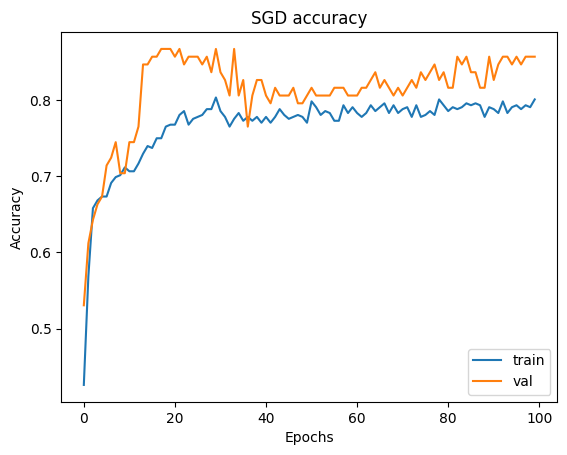

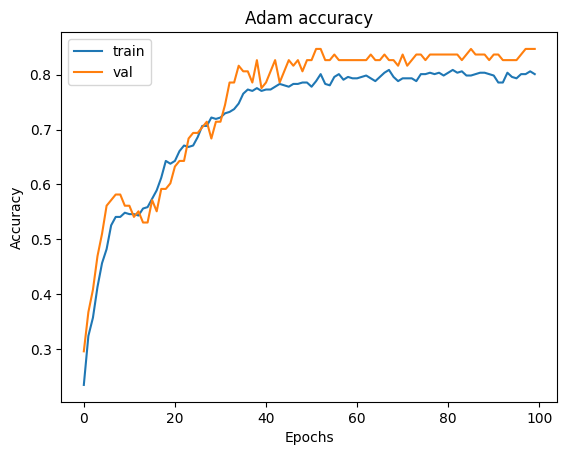

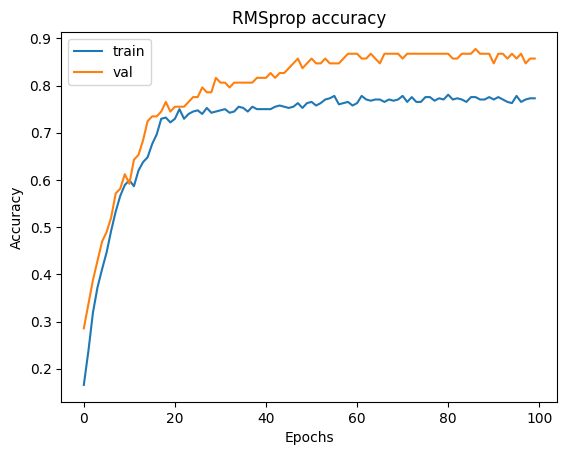

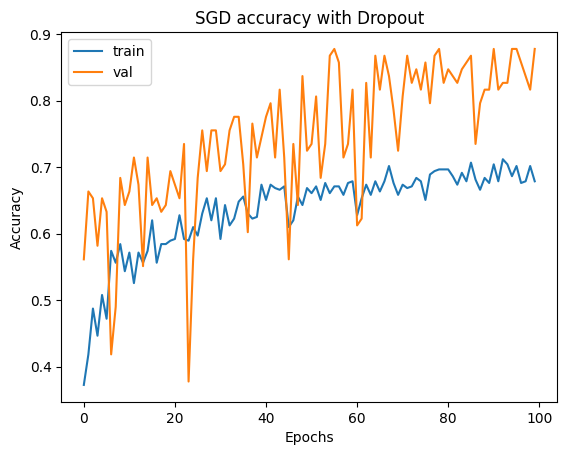

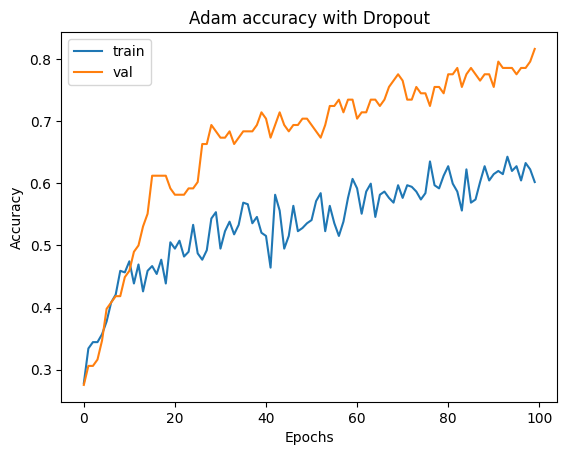

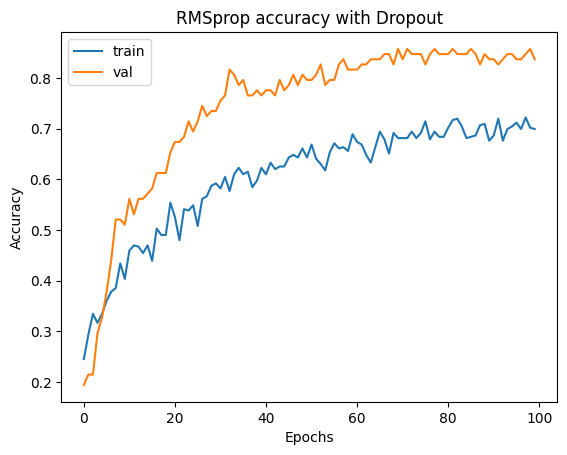

In [26]:
opt = [SGD(), Adam(), RMSprop()]
labels = ['SGD', 'Adam', 'RMSprop']

# сохраняем графики в списке
plots_model = []
plots_model_dropout = []

for i in range(3):
    model = create_model()
    model.compile(
        optimizer=opt[i],
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    hist = model.fit(
        X_train, y_train,
        epochs=100,
        validation_data=(X_test, y_test),
        verbose=1
    )
    
    fig, ax = plt.subplots()
    ax.plot(hist.history['accuracy'], label='train')
    ax.plot(hist.history['val_accuracy'], label='val')
    ax.set_title(f'{labels[i]} accuracy')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.legend()
    plots_model.append(fig)

opt = [SGD(), Adam(), RMSprop()]
for i in range(3):
    model_dropout = create_model_dropout()
    model_dropout.compile(
        optimizer=opt[i],
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    hist_dropout = model_dropout.fit(
        X_train, y_train,
        epochs=100,
        validation_data=(X_test, y_test),
        verbose=1
    )
    
    fig, ax = plt.subplots()
    ax.plot(hist_dropout.history['accuracy'], label='train')
    ax.plot(hist_dropout.history['val_accuracy'], label='val')
    ax.set_title(f'{labels[i]} accuracy with Dropout')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.legend()
    plots_model_dropout.append(fig)

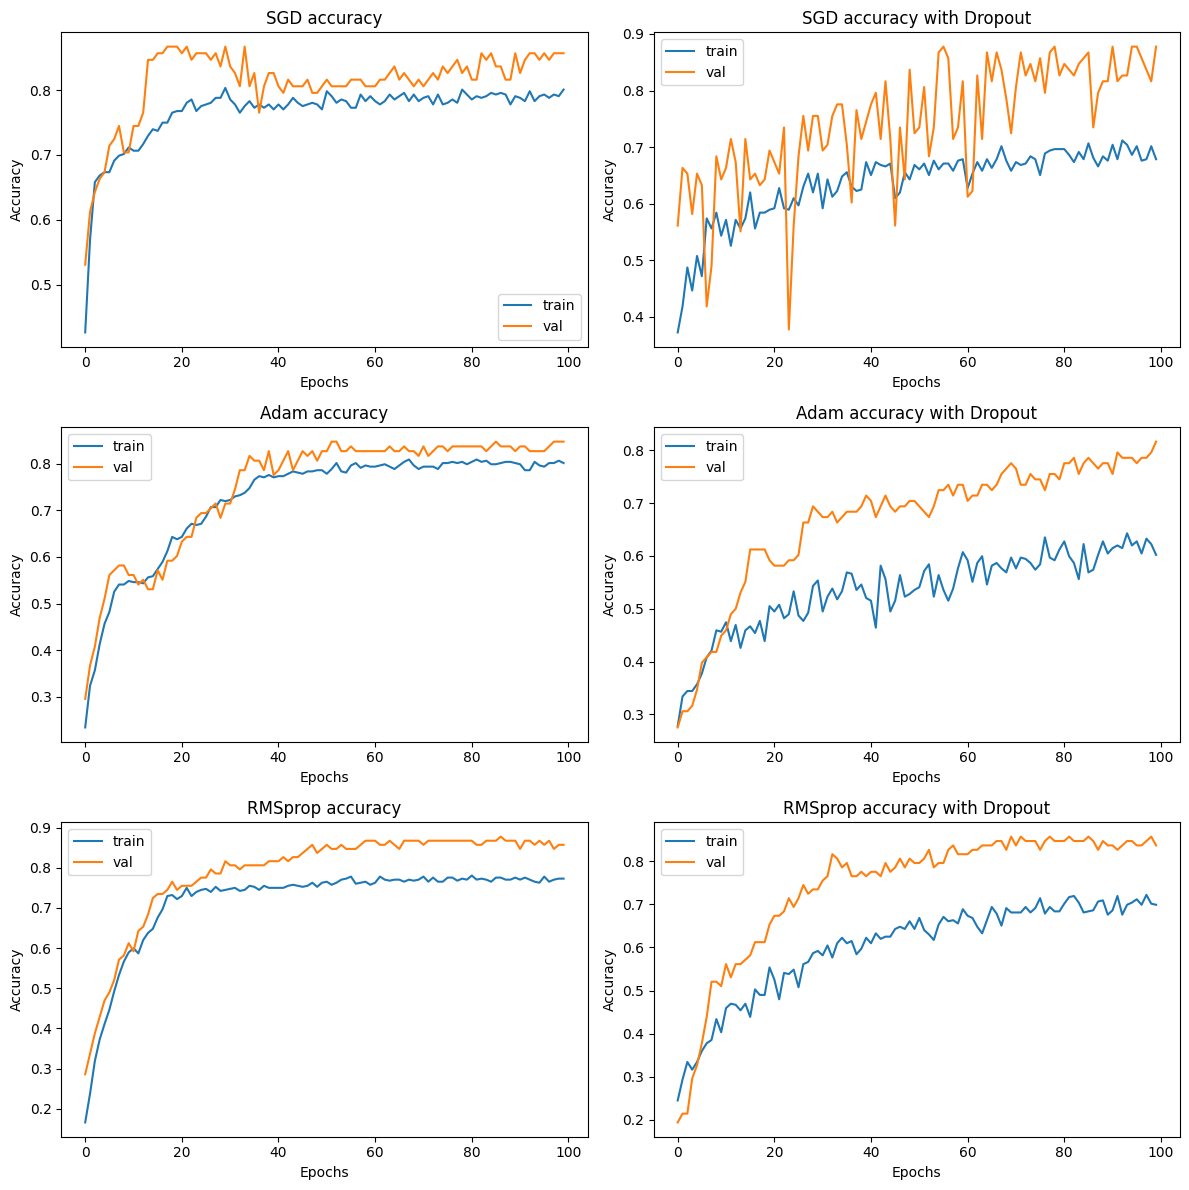

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

for i in range(3):
    # обычная модель (левый столбец)
    ax = axes[i, 0]
    for line in plots_model[i].axes[0].get_lines():
        ax.plot(line.get_xdata(), line.get_ydata(), label=line.get_label())
    ax.set_title(f'{labels[i]} accuracy')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.legend()

    # модель с Dropout (правый столбец)
    ax = axes[i, 1]
    for line in plots_model_dropout[i].axes[0].get_lines():
        ax.plot(line.get_xdata(), line.get_ydata(), label=line.get_label())
    ax.set_title(f'{labels[i]} accuracy with Dropout')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.legend()

plt.tight_layout()
plt.show()

Вывод: оптимизатор справляется со своей задачей, предотвращая переобучение. Но на небольшом наборе данных, малом числе эпох и большом коэффициенте dropout, обучение становится шумным. Что касается оптимизаторов: RMSProp показал стабильные результаты без резких скачков accuray на валидационной выборке. Adam и SGD демонстрировали резкие колебания. Судя по графикам, увеличив число эпох (если конечно необходимо) можно от них избавиться. 